# Explore here

In [1]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

In [2]:
df_raw

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [3]:
df_raw.to_csv('../data/raw/df_raw.csv')

In [4]:
print(df_raw.shape)
print(f"Spam: {len(df_raw.loc[df_raw.is_spam == True])}")
print(f"No spam: {len(df_raw.loc[df_raw.is_spam == False])}")

(2999, 2)
Spam: 696
No spam: 2303


In [5]:
df_raw.duplicated().sum()

np.int64(630)

In [6]:
df_raw.drop_duplicates(inplace=True)
df_raw.shape

(2369, 2)

In [7]:
df_raw.reset_index()

,index,url,is_spam
0,0,https://briefingday.us8.list-manage.com/unsubs...,True
1,1,https://www.hvper.com/,True
2,2,https://briefingday.com/m/v4n3i4f3,True
3,3,https://briefingday.com/n/20200618/m#commentform,False
4,4,https://briefingday.com/fan,True
...,...,...,...
2364,2993,https://www.theverge.com/2020/6/29/21306889/di...,False
2365,2994,https://www.smartcitiesworld.net/news/news/dee...,False
2366,2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2367,2997,https://www.technologyreview.com/2019/12/20/13...,False


In [8]:
df_raw.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 39.3+ KB


In [10]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    return text.split()

df_raw['url'] = df_raw['url'].apply(preprocess_text)

In [11]:
df_raw.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True


In [12]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")
stop_words.append('http')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df_raw['url'] = df_raw['url'].apply(lemmatize_text)
df_raw.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True


In [13]:
df = df_raw.copy()
df.to_csv('../data/processed/df.csv')

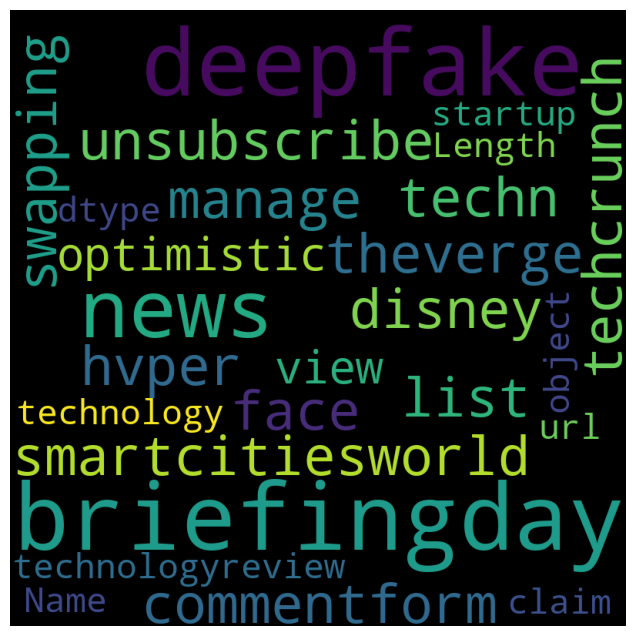

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df['url']
y = df['is_spam']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)

tokens_list = [" ".join(tokens) for tokens in X_train]
tokens_list2 = [" ".join(tokens) for tokens in X_test]

X_train_vec = vectorizer.fit_transform(tokens_list).toarray()
X_test_vec = vectorizer.transform(tokens_list2).toarray()

In [18]:
X_train_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1895, 418))

In [19]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train_vec, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
y_pred = model.predict(X_test_vec)

In [26]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred, y_test)
print(acc)

0.9556962025316456


In [27]:
from pickle import dump

dump(model, open("svm_classifier_spam_42.sav", "wb"))